In [ ]:
import warnings


In [ ]:
!pip install tensorflow
!pip install keras

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Reshape, Flatten
from tensorflow.keras.layers import BatchNormalization, LeakyReLU
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from keras import preprocessing
from keras.models import Sequential
from keras.layers import Conv2D,Dropout,Dense,Flatten,Conv2DTranspose,BatchNormalization,LeakyReLU,Reshape

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/elon_musk

/content/drive/MyDrive/elon_musk


In [ ]:
from PIL import Image
import os

image_folder = "/content/drive/MyDrive/elon_musk"
images = []

for filename in os.listdir(image_folder):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        img = Image.open(os.path.join(image_folder, filename))
        img = img.resize((28, 28))
        images.append(img)

In [ ]:
images

[<PIL.Image.Image image mode=RGB size=28x28>,
 <PIL.Image.Image image mode=RGB size=28x28>,
 <PIL.Image.Image image mode=RGB size=28x28>,
 <PIL.Image.Image image mode=RGB size=28x28>,
 <PIL.Image.Image image mode=RGB size=28x28>,
 <PIL.Image.Image image mode=RGB size=28x28>,
 <PIL.Image.Image image mode=RGB size=28x28>,
 <PIL.Image.Image image mode=RGB size=28x28>,
 <PIL.Image.Image image mode=RGB size=28x28>,
 <PIL.Image.Image image mode=RGB size=28x28>,
 <PIL.Image.Image image mode=RGB size=28x28>,
 <PIL.Image.Image image mode=RGB size=28x28>,
 <PIL.Image.Image image mode=RGB size=28x28>,
 <PIL.Image.Image image mode=RGB size=28x28>,
 <PIL.Image.Image image mode=RGB size=28x28>,
 <PIL.Image.Image image mode=RGB size=28x28>,
 <PIL.Image.Image image mode=RGB size=28x28>,
 <PIL.Image.Image image mode=RGB size=28x28>,
 <PIL.Image.Image image mode=RGB size=28x28>,
 <PIL.Image.Image image mode=RGB size=28x28>,
 <PIL.Image.Image image mode=RGB size=28x28>,
 <PIL.Image.Image image mode=RGB s

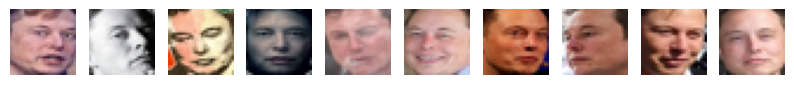

In [ ]:
num_images_to_display = 10

plt.figure(figsize=(10, 10))
for i in range(num_images_to_display):
    plt.subplot(1, num_images_to_display, i + 1)
    plt.imshow(images[i])
    plt.axis('off')

plt.show()

In [ ]:
image_arrays = [np.array(img) for img in images]
X_train = np.stack(image_arrays)

In [ ]:
print("Shape of X_train:", X_train.shape)
print("Pixel values of the first image:")
print(X_train[0])

Shape of X_train: (598, 28, 28, 3)
Pixel values of the first image:
[[[ 41  29  54]
  [ 44  31  50]
  [ 66  49  63]
  ...
  [127  98 117]
  [ 50  32  58]
  [ 35  22  55]]

 [[ 42  24  47]
  [ 70  51  68]
  [ 96  75  89]
  ...
  [171 141 154]
  [125 100 121]
  [ 37  18  47]]

 [[ 88  67  85]
  [115  92 108]
  [126 101 116]
  ...
  [171 139 149]
  [171 139 159]
  [127 100 126]]

 ...

 [[196 155 150]
  [185 143 143]
  [160 120 125]
  ...
  [173 147 144]
  [177 149 146]
  [180 151 148]]

 [[207 165 165]
  [198 156 156]
  [180 139 139]
  ...
  [172 142 137]
  [169 140 136]
  [172 143 140]]

 [[212 173 168]
  [212 173 169]
  [199 159 156]
  ...
  [163 134 133]
  [164 131 128]
  [164 132 129]]]


In [ ]:
X_train_df = pd.DataFrame(X_train.reshape(X_train.shape[0], -1))
print("Shape of X_train_df:", X_train_df.shape)

Shape of X_train_df: (598, 2352)


In [ ]:
X_train = X_train_df.values
print("Shape of X_train:", X_train.shape)

Shape of X_train: (598, 2352)


In [ ]:
X_train = X_train.reshape(-1, 28, 28, 1)
print("New shape of X_train:", X_train.shape)

New shape of X_train: (1794, 28, 28, 1)


**Data Visualization**

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(8, 8))
idx = 0

for i in range(2):
    for j in range(2):
        random_color = np.random.rand(28, 28, 3)
        axes[i, j].imshow(X_train[idx].reshape(28, 28, 1) * random_color)
        idx += 1
        axes[i, j].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
X_train =  X_train.astype('float32')

In [ ]:
X_train = X_train/255
X_train = X_train*2 - 1.

In [ ]:
print(X_train.max(),X_train.min())

1.0 -1.0


**Simple GAN Model**

In [ ]:
generator = Sequential()
generator.add(Dense(256,input_shape=[100]))
generator.add(LeakyReLU(alpha=0.2))
generator.add(BatchNormalization(momentum=0.8))
generator.add(Dense(512))
generator.add(LeakyReLU(alpha=0.2))
generator.add(BatchNormalization(momentum=0.8))
generator.add(Dense(1024))
generator.add(LeakyReLU(alpha=0.2))
generator.add(BatchNormalization(momentum=0.8))
generator.add(Dense(2352))
generator.add(Reshape([28,28,3]))

In [ ]:
generator.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_78 (Dense)            (None, 256)               25856     
                                                                 
 leaky_re_lu_53 (LeakyReLU)  (None, 256)               0         
                                                                 
 batch_normalization_29 (Bat  (None, 256)              1024      
 chNormalization)                                                
                                                                 
 dense_79 (Dense)            (None, 512)               131584    
                                                                 
 leaky_re_lu_54 (LeakyReLU)  (None, 512)               0         
                                                                 
 batch_normalization_30 (Bat  (None, 512)              2048      
 chNormalization)                                    

In [ ]:
discriminator = Sequential()
discriminator.add(Dense(1,input_shape=[28,28,3]))
discriminator.add(Flatten())
discriminator.add(Dense(512))
discriminator.add(LeakyReLU(alpha=0.2))
discriminator.add(Dropout(0.5))
discriminator.add(Dense(256))
discriminator.add(LeakyReLU(alpha=0.2))
discriminator.add(Dropout(0.5))
discriminator.add(Dense(128))
discriminator.add(LeakyReLU(alpha=0.2))
discriminator.add(Dropout(0.5))
discriminator.add(Dense(3,activation='sigmoid'))

In [ ]:
discriminator.summary()

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_102 (Dense)           (None, 28, 28, 1)         4         
                                                                 
 flatten_13 (Flatten)        (None, 784)               0         
                                                                 
 dense_103 (Dense)           (None, 512)               401920    
                                                                 
 leaky_re_lu_68 (LeakyReLU)  (None, 512)               0         
                                                                 
 dropout_38 (Dropout)        (None, 512)               0         
                                                                 
 dense_104 (Dense)           (None, 256)               131328    
                                                                 
 leaky_re_lu_69 (LeakyReLU)  (None, 256)             

In [ ]:
GAN =Sequential([generator,discriminator])
discriminator.compile(optimizer='adam',loss='binary_crossentropy')
discriminator.trainable = False

In [ ]:
GAN.compile(optimizer='adam',loss='binary_crossentropy')

In [ ]:
GAN.layers

In [ ]:
GAN.summary()

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_26 (Sequential)  (None, 28, 28, 3)         3100720   
                                                                 
 sequential_34 (Sequential)  (None, 3)                 566535    
                                                                 
Total params: 3,667,255
Trainable params: 3,097,136
Non-trainable params: 570,119
_________________________________________________________________


In [ ]:
epochs = 30
batch_size = 100
noise_shape=100

In [ ]:
with tf.device('/gpu:0'):
 for epoch in range(epochs):
    print(f"Currently on Epoch {epoch+1}")


    for i in range(X_train.shape[0]//batch_size):

        if (i+1)%50 == 0:
            print(f"\tCurrently on batch number {i+1} of {X_train.shape[0]//batch_size}")

        noise=np.random.normal(size=[batch_size,noise_shape])

        gen_image = generator.predict_on_batch(noise)

        train_dataset = X_train[i*batch_size:(i+1)*batch_size]

         #training discriminator on real images
        train_label=np.ones(shape=(batch_size,1))
        discriminator.trainable = True
        d_loss_real=discriminator.train_on_batch(train_dataset,train_label)

        #training discriminator on fake images
        train_label=np.zeros(shape=(batch_size,1))
        d_loss_fake=discriminator.train_on_batch(gen_image,train_label)


        #training generator
        noise=np.random.normal(size=[batch_size,noise_shape])
        train_label=np.ones(shape=(batch_size,1))
        discriminator.trainable = False

        d_g_loss_batch =GAN.train_on_batch(noise, train_label)

        #plotting generated images at the start and then after every 10 epoch
    if epoch % 10 == 0:
        samples = 10
        x_fake = generator.predict(np.random.normal(loc=0, scale=1, size=(samples, 100)))

        for k in range(samples):
            plt.subplot(2, 5, k+1)
            plt.imshow(x_fake[k].reshape(28, 28, 3), cmap='gray')
            plt.xticks([])
            plt.yticks([])

        plt.tight_layout()
        plt.show()


print('Training is complete')

Currently on Epoch 1


ValueError: ignored

In [ ]:
noise=np.random.normal(size=[10,noise_shape])

gen_image = generator.predict(noise)

In [ ]:
plt.imshow(noise)
plt.title('How the noise looks')

**Generator producing images from noise**

In [ ]:
fig,axe=plt.subplots(2,5)
fig.suptitle('Generated Images from Noise using GANs')
idx=0
for i in range(2):
    for j in range(5):
         axe[i,j].imshow(gen_image[idx].reshape(28,28),cmap='gray')
         idx+=1

**GAN using Deep Convolutions**

In [ ]:
generator = Sequential()
generator.add(Dense(7 * 7 * 128, input_shape=[100]))
generator.add(Reshape([7, 7, 128]))
generator.add(BatchNormalization())
generator.add(Conv2DTranspose(64, kernel_size=5, strides=2, padding="same",
                                 activation="relu"))
generator.add(BatchNormalization())
generator.add(Conv2DTranspose(1, kernel_size=5, strides=2, padding="same",
                                 activation="tanh"))

In [ ]:
generator.summary()

In [ ]:
discriminator = Sequential()
discriminator.add(Conv2D(64, kernel_size=5, strides=2, padding="same",
                        activation=LeakyReLU(0.3),
                        input_shape=[28, 28, 1]))
discriminator.add(Dropout(0.5))
discriminator.add(Conv2D(128, kernel_size=5, strides=2, padding="same",
                        activation=LeakyReLU(0.3)))
discriminator.add(Dropout(0.5))
discriminator.add(Flatten())
discriminator.add(Dense(1, activation="sigmoid"))

In [ ]:
discriminator.summary()

In [ ]:
GAN =Sequential([generator,discriminator])
discriminator.compile(optimizer='adam',loss='binary_crossentropy')
discriminator.trainable = False

In [ ]:
GAN.compile(optimizer='adam',loss='binary_crossentropy')

In [ ]:
GAN.layers

In [ ]:
GAN.summary()

In [ ]:
epochs = 150 #vary epoch size as per required to train the model
batch_size = 100

In [ ]:
noise_shape=100

In [ ]:
with tf.device('/gpu:0'):
 for epoch in range(epochs):
    print(f"Currently on Epoch {epoch+1}")


    for i in range(X_train.shape[0]//batch_size):

        if (i+1)%50 == 0:
            print(f"\tCurrently on batch number {i+1} of {X_train.shape[0]//batch_size}")

        noise=np.random.normal(size=[batch_size,noise_shape])

        gen_image = generator.predict_on_batch(noise)

        train_dataset = X_train[i*batch_size:(i+1)*batch_size]

          #training discriminator on real images
        train_label=np.ones(shape=(batch_size,1))
        discriminator.trainable = True
        d_loss_real=discriminator.train_on_batch(train_dataset,train_label)

        #training discriminator on fake images
        train_label=np.zeros(shape=(batch_size,1))
        d_loss_fake=discriminator.train_on_batch(gen_image,train_label)


        #training generator
        noise=np.random.normal(size=[batch_size,noise_shape])
        train_label=np.ones(shape=(batch_size,1))
        discriminator.trainable = False #while training the generator as combined model,discriminator training should be turned off

        d_g_loss_batch =GAN.train_on_batch(noise, train_label)

         #plotting generated images at the start and then after every 10 epoch
    if epoch % 10 == 0:
        samples = 10
        x_fake = generator.predict(np.random.normal(loc=0, scale=1, size=(samples, 100)))

        for k in range(samples):
            plt.subplot(2, 5, k+1)
            plt.imshow(x_fake[k].reshape(28, 28), cmap='gray')
            plt.xticks([])
            plt.yticks([])

        plt.tight_layout()
        plt.show()


print('Training is complete')

In [ ]:
noise=np.random.normal(loc=0, scale=1, size=(100,noise_shape))

gen_image = generator.predict(noise)

In [ ]:
fig,axe=plt.subplots(2,5)
fig.suptitle("Actual Images")
idx = 0
for i in range(2):
    for j in range(5):
        axe[i,j].imshow(X_train[idx].reshape(28,28),cmap='gray')
        idx+=10

In [ ]:
fig,axe=plt.subplots(2,5)
fig.suptitle('Generated Images from Noise using DCGANs')
idx=0
for i in range(2):
     for j in range(5):
         axe[i,j].imshow(gen_image[idx].reshape(28,28),cmap='gray')
         idx+=3